In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")


In [3]:
# Display dataset info
print("Train Data Info:")
print(train.info())
print("\nTest Data Info:")
print(test.info())

# Describe numerical columns
train.describe()

# Check missing values
train.isnull().sum()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

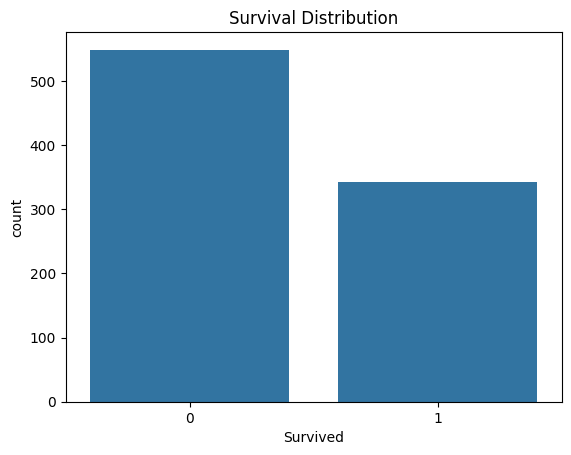

In [4]:
# Univariate Analysis
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')
plt.show()



-The number of people who did not survive (0) is greater than those who did survive (1).

-Indicates an imbalance in survival outcomes, with more fatalities than survivors.



-This skewness may impact classification model performance and must be considered during model building.

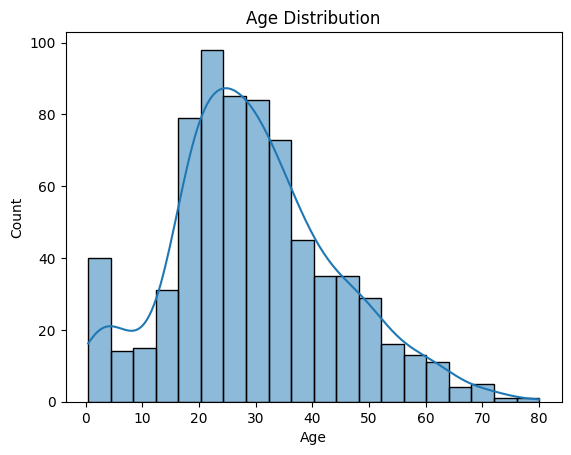

In [5]:
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

-Age distribution is right-skewed, meaning most passengers were young adults.

-The highest concentration of passengers was around 20–30 years old.



-There are outliers, including infants and older passengers above 60.

-The smooth KDE curve shows a gradual decline after age 35.



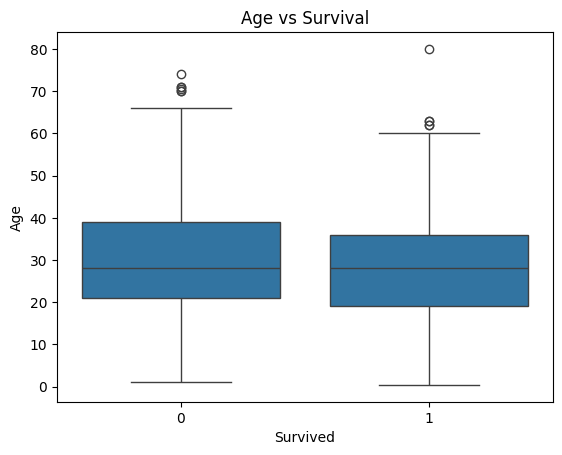

In [6]:
# Bivariate Analysis
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age vs Survival')
plt.show()




-The median age of survivors (Survived = 1) is lower than that of non-survivors.

-Younger passengers had a slightly higher chance of survival.



-The age range of survivors is narrower, with fewer elderly survivors.

-Several outliers are present in both survival groups, including infants and very elderly passengers.



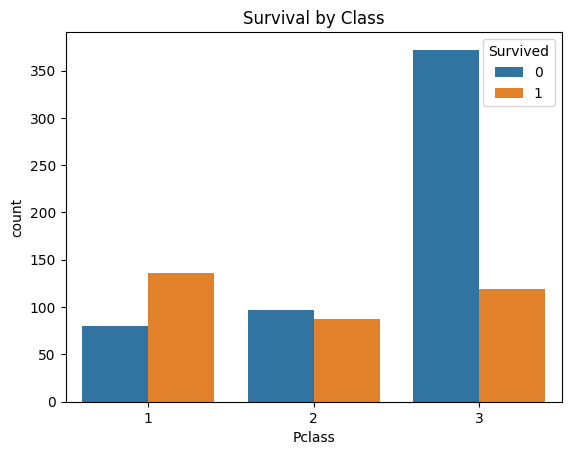

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Class')
plt.show()

-1st class passengers had the highest survival rate, clearly visible with a larger number of survivors.

-3rd class passengers had the lowest survival rate, with a majority not surviving.



-This indicates a strong relationship between socio-economic status and survival, as those in higher classes had better access to lifeboats or rescue.

-The trend suggests that travel class was a significant predictor of survival outcome.

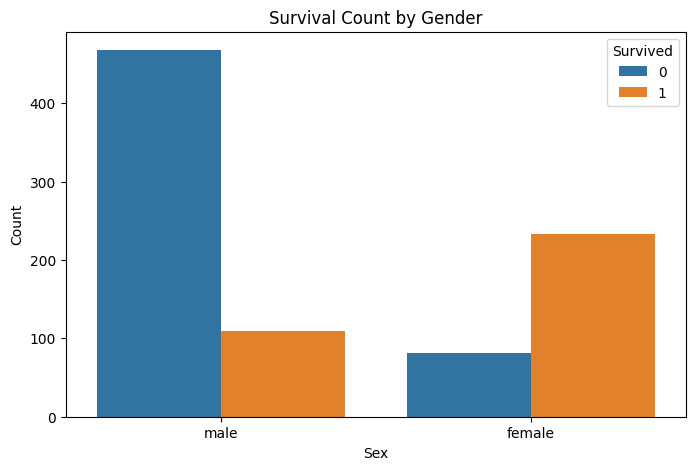

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

-Female passengers had a significantly higher survival rate compared to males.

-The majority of male passengers did not survive, while most females survived.



-This pattern reflects the "women and children first" policy often followed during evacuations.

-Gender is a strong predictor of survival and shows a clear bivariate relationship with the target variable.

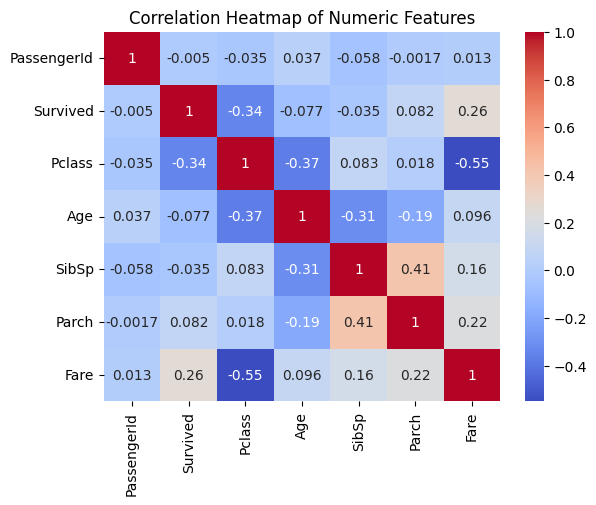

In [9]:
# Multivariate Analysis
numeric_df = train.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

-There is a moderate negative correlation between Pclass and Fare (≈ -0.55), meaning higher-class passengers tended to pay higher fares.

-Pclass is negatively correlated with survival (Survived ≈ -0.34), supporting earlier findings that passengers in lower classes were less likely to survive.



-Fare shows a positive correlation with survival (≈ 0.26), implying that passengers who paid higher fares had better survival chances.



-Other numeric features like Age and SibSp have weak or negligible correlations with survival.

-No signs of strong multicollinearity between variables, making this data suitable for modeling.

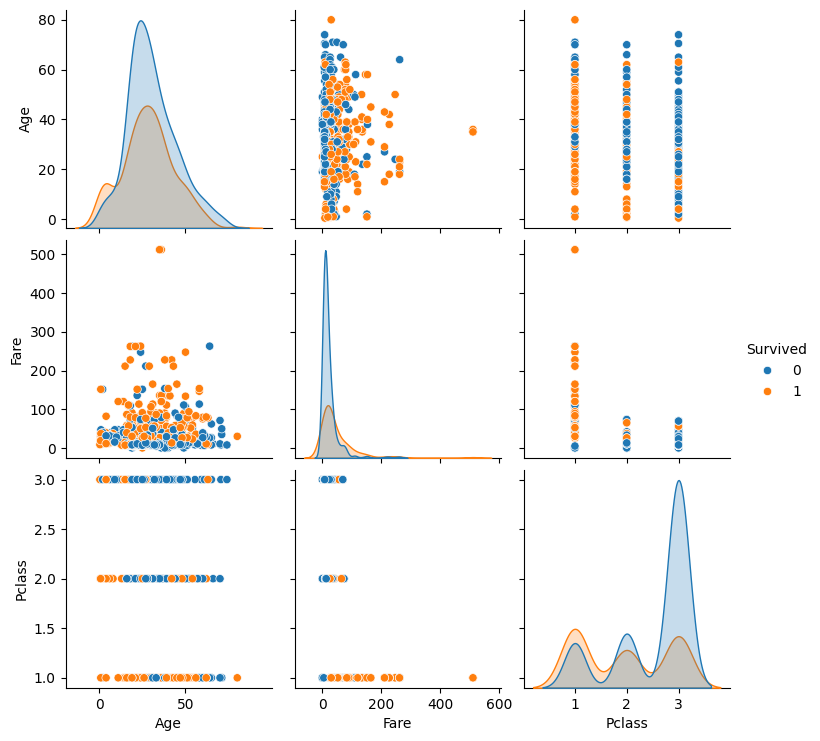

In [10]:
# Pairplot 
sns.pairplot(train[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')

-The pairplot reveals that higher Fare and lower Pclass are generally associated with greater survival.

-Survivors are more concentrated in lower Pclass values (1st class), while non-survivors cluster in higher class numbers (e.g., 3rd class).



-The Fare vs Age subplot shows that some survivors paid very high fares, while many non-survivors paid relatively lower fares.

-There is no strong linear relationship between Age and Fare, but survival is more visible in the Fare and Pclass dimensions.



-Overall, Fare and Pclass appear to be key features that differentiate survival groups in multivariate space.